### Notebook para probar el manejo de img en Python y Jupyter


In [14]:
import cv2 as cv
from IPython.display import display
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [4]:
img_path = "../images/botellas.tif"
img = cv2.imread(img_path)
print("Dimensiones de la imagen: ", img.shape)
print("Tipo de dato de la imagen", img.dtype)

Dimensiones de la imagen:  (196, 285, 3)
Tipo de dato de la imagen uint8


#### Dos formas de mostrar una imagen
1. Con PIL y IPython.display
2. Con PIL y MatPlotLib

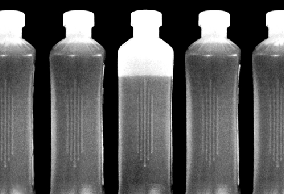

In [11]:
# Primera forma
pil_img = Image.open(img_path)
display(pil_img)
# display(img)

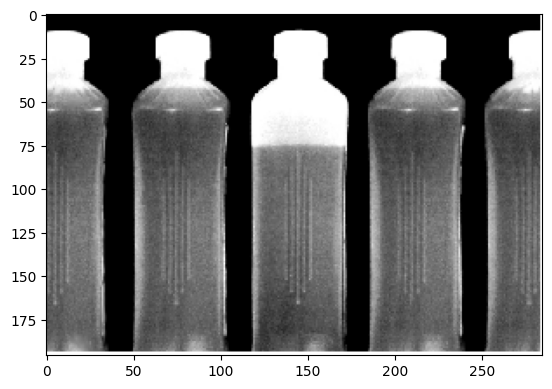

In [47]:
# Segunda forma (le agrega los ejes x e y, que puede ser util para ubicar pixeles)
pil_img = Image.open(img_path)
# plt.imshow(pil_img)
plt.imshow(img)

#### Creacion, lectura y guardado de imagenes


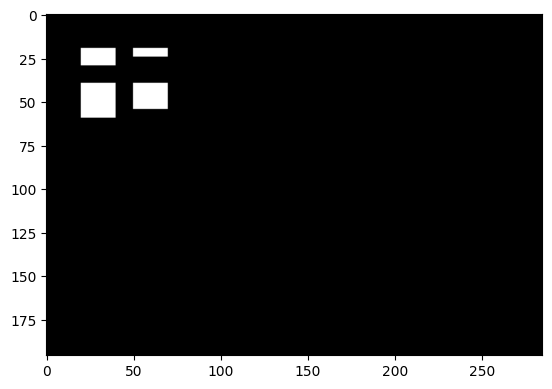

True

In [58]:
# Crear una imagen negra (todos sus valores son 0) y transformar una zona en blanco
new_img = np.zeros(img.shape,dtype=np.uint8)

new_img[20:30,20:40]=255
new_img[40:60,20:40]=255
new_img[20:25,50:70]=255
new_img[40:55,50:70]=255

plt.imshow(new_img.astype(np.uint8))
plt.show()

save_path = "../images/nueva_img.jpg"
cv2.imwrite(save_path, new_img)

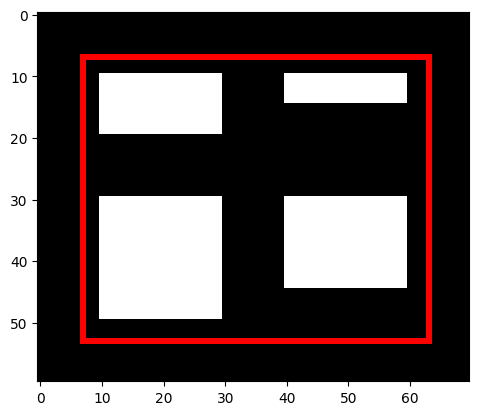

In [59]:
# Copiar una ROI (Region Of Interest) de la nueva imagen

x0, x1, y0, y1 = [10, 70, 10, 80]
new_img_roi = new_img[x0:x1,y0:y1].copy()

# rectangulo creado a ojo
cv2.rectangle(new_img_roi,[7,7],[63, 53],[255,0,0])

plt.imshow(new_img_roi.astype(np.uint8))
plt.show()

In [226]:
def enclose_objects(img,threshold=0,offset=0):
    enclosed_img = img.copy()
    print(img.shape)
    white_pixels = []

    [height,width,_] = enclosed_img.shape

    for y in range(height):
        for x in range(width):
            # bool_arr = np.greater(enclosed_img[y,x],[0,0,0]) 
            # result = np.isin(False,bool_arr)

            if (~np.isin(False,np.greater(enclosed_img[y,x],[threshold,threshold,threshold]))):
                white_pixels.append([y,x])

    print(len(white_pixels))

    max_point = white_pixels[0].copy()  # Initialize to the first point in the array
    min_point = white_pixels[0].copy()  # Initialize to the first point in the array

    for point in white_pixels:
        norm_p = np.linalg.norm(point)
        norm_p_max = np.linalg.norm(max_point)
        norm_p_min = np.linalg.norm(min_point)
        if norm_p > norm_p_max:
            max_point = point.copy()
        if norm_p < norm_p_min:
            min_point = point.copy()

    print("Maximum point:", max_point)
    print("Minimum point:", min_point)

    # print("%d,%d - %d,%d"%(min_y,min_x,max_y,max_x))

    min_x, min_y = min_point
    max_x, max_y = max_point

    cv2.rectangle(enclosed_img,(min_y-offset,min_x-offset),(max_y+offset,max_x+offset),(0,0,250))
    return enclosed_img



(145, 285, 3)
28861
Maximum point: [144, 284]
Minimum point: [5, 0]


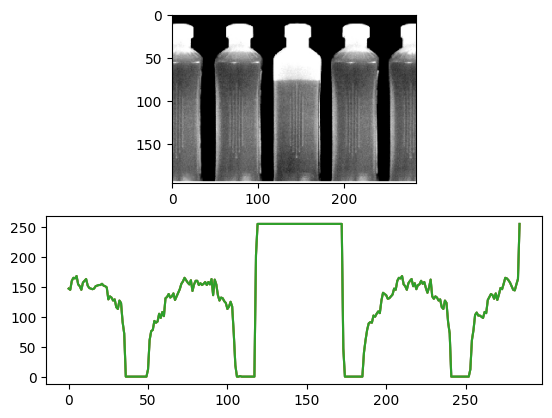

In [234]:
roi_img = new_img[x0:x1,y0:y1].copy()

bottle_img = cv2.imread(img_path)

enc_img = enclose_objects(bottle_img[5:150,:],3,0)

plt.figure()
plt.subplot(2,1,1)
plt.imshow(bottle_img,cmap="gray")

plt.subplot(2,1,2)
plt.plot(bottle_img[50,:])

plt.show()

<class 'numpy.ndarray'>
(60, 70, 3)


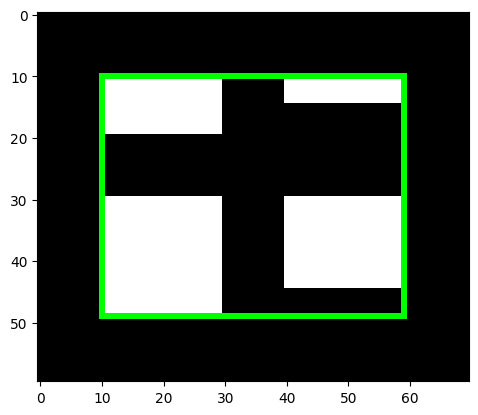

In [94]:
new_img_roi2 = new_img[x0:x1,y0:y1].copy()

print(type(new_img_roi2))
print(new_img_roi2.shape)

[height,width,_] = new_img_roi2.shape


white_pixels = []

for y in range(height):
    for x in range(width):
        if (new_img_roi2[y,x].any() > 0):
            # print("Punto (%d,%d) - Valor %s"%(x,y,new_img_roi2[y,x]))
            white_pixels.append([y,x])

max_x = float('-inf')  
max_y = float('-inf')  
min_x = float('inf')  
min_y = float('inf')  

for pair in white_pixels:
    x, y = pair
    max_x = max(max_x, x)
    max_y = max(max_y, y)
    min_x = min(min_x, x)
    min_y = min(min_y, y)

cv2.rectangle(new_img_roi2,(min_y,min_x),(max_y,max_x),(0,255,0))




plt.imshow(new_img_roi2)
plt.show()

In [92]:
from aux import kmeans

kmeans()

importado
